**Lógica Fuzzy**

prof: Sergio Assuncao Monteiro, DSc

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

## Exemplo de aplicação de lógica nebulosa (fuzzy)

Adaptado do trabalho disponível em [pythonhosted.org](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)

O problema consiste em definir o valor da gorjeta em um restaurante com base na qualidade do serviço e da comida.

* **Entrada (antecedentes):** 

> Qualidade da Comida
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): péssima, comível, deliciosa

> Qualidade do Serviço
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): ruim, aceitável, excelente


* **Saída (consequentes):**

> Gorjeta 

>> Universo (valores nítidos/*crisp*): 0 a 25%

>> Conjunto difuso (valores difusos): baixa, média, alta

### Regras de Decisão

> **SE** o serviço foi excelente **OU** a comida estava deliciosa **ENTÃO** a gorjeta deve ser alta

> **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser média

> **SE** o serviço foi ruim **E** a comida estava péssima **ENTÃO** a gorjeta deve ser baixa



In [ ]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=ee3e4afac2d147a48fe81d9484c6d1cacda50cd01e2934f76451557d4db8cbd3
  Stored in directory: /root/.cache/pip/wheels/ff/62/9e/0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d6747f684631ec4e

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
comida.automf(names=['péssima', 'comível', 'deliciosa'])


# Cria as funções de pertinência usando tipos variados
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['excelente'] = fuzz.gaussmf(servico.universe, 10,3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 13,15, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25])

### Mostrando graficamente as funções de partinência criadas

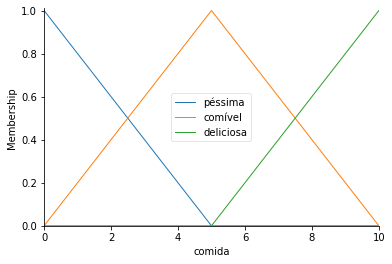

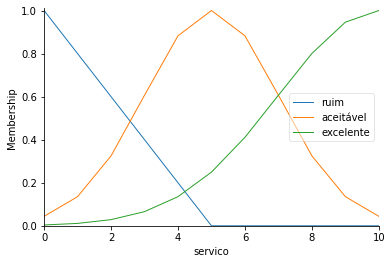

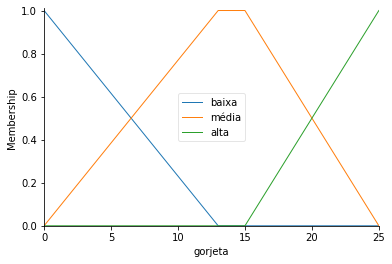

In [ ]:
comida.view()
servico.view()
gorjeta.view()


### Criando as regras de decisão difusas

In [ ]:
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

### Criando e simulando um controlador nebuloso

In [ ]:
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

# Computando o resultado
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])


18.57604101547121


### Mostrando graficamente o resultado

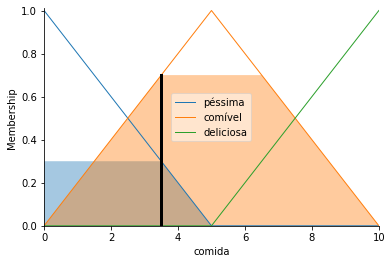

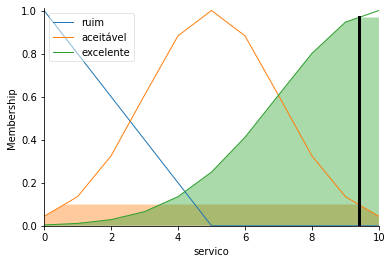

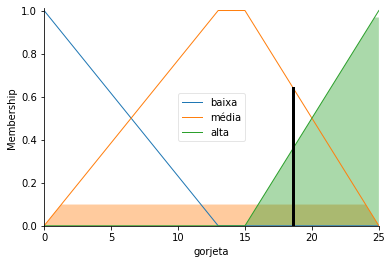

In [ ]:
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)